In [1]:
import pandas as pd
import urllib.request

data = pd.read_csv('../../twitter/tweetdata/2019_up2_tweet.csv', error_bad_lines=False)
data = data.append(pd.read_csv('../../twitter/tweetdata/2019_up2_tweet(e).csv', error_bad_lines=False))


In [2]:
text = data[['text']].astype(str)
text['text'] = text.apply(lambda row: row['text'].replace("/"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("-"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("—"," "), axis=1)
#text['main article'] = text.apply(lambda row: row['main article'].replace("",""), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("*"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("…"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("\\"," "), axis=1)



In [3]:
import nltk
text['text'] = text.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)

In [4]:
text['text']

0     [BTC, waking, up, again, ., Up, and, down, but...
1                             [Got, ta, love, Andre, .]
2     [From, all, Bitcoin, developers, ., This, is, ...
3     [What, do, you, mean, ?, We, get, all, the, co...
4     [We, do, n't, work, on, the, master, github, r...
                            ...                        
18    [#, Ethereum, 's, on, chain, stablecoin, trans...
19    [Really, excited, to, welcome, @, ethereum, Fo...
20    [Kudos, to, @, metamask_io, for, always, putti...
21    [The, @, AlethioEthstats, team, analyzed, unus...
22    [Are, you, an, #, Ethereum, smart, contract, d...
Name: text, Length: 400, dtype: object

In [5]:
# 소문자 적용 , - 문자 삭제
text['text'] = text['text'].apply(lambda x : [word.lower().replace("-","") for word in x])
# 공백문자 삭제
text['text'] = text['text'].apply(lambda x : [word for word in x if word])

In [6]:
from nltk.tag import pos_tag

text['pos tag'] = text.apply(lambda row: pos_tag(row['text']), axis=1)

In [7]:
text['pos tag']

0     [(btc, NN), (waking, VBG), (up, RP), (again, R...
1     [(got, VBD), (ta, JJ), (love, NN), (andre, NN)...
2     [(from, IN), (all, DT), (bitcoin, NN), (develo...
3     [(what, WP), (do, VBP), (you, PRP), (mean, VB)...
4     [(we, PRP), (do, VBP), (n't, RB), (work, VB), ...
                            ...                        
18    [(#, #), (ethereum, NN), ('s, POS), (on, IN), ...
19    [(really, RB), (excited, VBN), (to, TO), (welc...
20    [(kudos, NN), (to, TO), (@, VB), (metamask_io,...
21    [(the, DT), (@, NN), (alethioethstats, VBZ), (...
22    [(are, VBP), (you, PRP), (an, DT), (#, #), (et...
Name: pos tag, Length: 400, dtype: object

In [8]:
# 불용어 품사 제거
text['text'] = text['pos tag'].apply(lambda x: [word[0] for word in x if word[1] not in ('CC','CD','DT','EX','IN','LS','MD','PRP','PRP$','RB','TO','UH','WDT','WP','WP$','WRB')])

In [9]:
text['text']

0     [btc, waking, up, ., long, term, steady, growt...
1                             [got, ta, love, andre, .]
2     [bitcoin, developers, ., is, open, source, ., ...
3     [do, mean, ?, get, all, code, bitcoin, ., ever...
4     [do, work, master, github, repository, ,, 's, ...
                            ...                        
18    [#, ethereum, 's, chain, stablecoin, transacti...
19    [excited, welcome, @, ethereum, foundation, 's...
20    [kudos, @, metamask_io, putting, premium, priv...
21    [@, alethioethstats, analyzed, unusual, @, mak...
22    [are, #, ethereum, smart, contract, developer,...
Name: text, Length: 400, dtype: object

In [10]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
text['text'] = text['text'].apply(lambda x: [word for word in x if word not in (stop)])

In [11]:
import csv
stopword_list =[]
f = open('../../stopword/stop_en.txt', 'r')
reader = csv.reader(f)
for row in reader:
    #print(row[0])
    stopword_list.append(row[0])
    #pass
f.close()

text['text'] = text['text'].apply(lambda x: [word for word in x if word not in stopword_list])

In [12]:
import re
pattern=re.compile(r'\.')
print(pattern.search('abc.de'))

text['text'] = text['text'].apply(lambda x: [word for word in x if pattern.search(word)== None])

<re.Match object; span=(3, 4), match='.'>


In [13]:
number_pattern=re.compile(r'[0-9]\,[0-9]')
text['text'] = text['text'].apply(lambda x: [word for word in x if number_pattern.search(word)== None])

In [14]:
native_number_pattern=re.compile(r'[0-9]')
text['text'] = text['text'].apply(lambda x: [word for word in x if native_number_pattern.search(word)== None])

In [15]:
star_pattern=re.compile(r'[a-z0-9*]\*[a-z0-9*]')
text['text'] = text['text'].apply(lambda x: [word for word in x if star_pattern.search(word)== None])

In [16]:
from nltk.stem import WordNetLemmatizer
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x]) # 동사 
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='a') for word in x]) # 형용사
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='n') for word in x]) # 명사
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='r') for word in x]) # 부사
#print(text)

In [17]:
tokenized_doc = text['text'].apply(lambda x: [word for word in x if len(word) > 3])
#print(tokenized_doc)

In [18]:
article_contents = tokenized_doc.values.tolist()

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict

In [20]:
tokenized_doc_tfidf = tokenized_doc.apply(lambda x : ' '.join(x))

In [21]:
article_contents_tfidf = tokenized_doc_tfidf.values.tolist()

In [22]:
vectorizer = TfidfVectorizer()
sp_matrix = vectorizer.fit_transform([ " ".join(article_contents_tfidf) ])

In [23]:
word2id = defaultdict(lambda: 0)

In [24]:
for idx, feature in enumerate(vectorizer.get_feature_names()):
    word2id[feature] = idx

In [25]:
tf_idf_result = []
token_list = []
for i, sent in enumerate([" ".join(article_contents_tfidf)]):
    for token in sent.split() :
        if token not in token_list :
            temp=[]
            temp.append(token)
            temp.append(sp_matrix[i, word2id[token]])
            token_list.append(token)
            tf_idf_result.append(temp)

In [26]:
len(tf_idf_result)

1772

In [27]:
tf_idf_value =[]
for tf_idf_element in tf_idf_result :
    tf_idf_value.append(tf_idf_element[1])
print(len(tf_idf_value))  ## tf-idf 값을 배열에 담음

1772


In [28]:
from gensim import corpora
tokenized_doc = [d.split() for d in token_list]
dictionary = corpora.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]
print(corpus[1]) 

[(1, 1)]


In [29]:
import gensim
NUM_TOPICS = 4 #20개의 토픽, k=20
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=50) 
# passes is similar with epoch , iterarion : loop per document
topics = ldamodel.print_topics(num_words=8)
for topic in topics:
    print(topic)

(0, '0.001*"idealise" + 0.001*"linearize" + 0.001*"wire" + 0.001*"node" + 0.001*"committee" + 0.001*"clear" + 0.001*"franc" + 0.001*"negotiate"')
(1, '0.001*"goodbye" + 0.001*"functionality" + 0.001*"casares" + 0.001*"insurance" + 0.001*"haha" + 0.001*"poise" + 0.001*"capable" + 0.001*"ready"')
(2, '0.001*"reverse" + 0.001*"deminimis" + 0.001*"deflation" + 0.001*"shooter" + 0.001*"pleasure" + 0.001*"illusion" + 0.001*"year" + 0.001*"concept"')
(3, '0.001*"digicash" + 0.001*"electronic" + 0.001*"physical" + 0.001*"launch" + 0.001*"initial" + 0.001*"transactional" + 0.001*"square" + 0.001*"apply"')


In [30]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [31]:
sentences = article_contents

In [32]:
from gensim.models import Word2Vec

In [33]:
model = Word2Vec(sentences, min_count=1)

In [34]:
len(model.wv.vocab)

1772

In [35]:
X = model[model.wv.vocab]

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [36]:
from nltk.cluster import KMeansClusterer
import nltk
NUM_CLUSTERS=4
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
#kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.euclidean_distance, repeats=25)
#euclidean_distance
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
#print(X)
#print(assigned_clusters)

In [37]:
import pandas as pd
import numpy as np
temp_heder = ['raw_data','word','cluster','centroid','distance','tfidf','score','closer#']
temp_cluster_result = pd.DataFrame(columns=temp_heder)

In [38]:
temp_cluster_result['word'] = list(model.wv.vocab)

In [39]:
temp_cluster_result['cluster'] = assigned_clusters

In [40]:
temp_cluster_result['raw_data'] = X.tolist()

In [41]:
#temp_cluster_result['raw_data']
temp_cluster_result['centroid'] = temp_cluster_result['cluster'].apply(lambda x : kclusterer.means()[x])

In [42]:
from sklearn.metrics import pairwise_distances

In [43]:
cosine_centroid_list = []
for cosine_centroid in temp_cluster_result['centroid'] :
    cosine_centroid_list.append(cosine_centroid.tolist())

In [44]:
len(cosine_centroid_list)

1772

In [45]:
temp_distance = pairwise_distances(X,cosine_centroid_list, metric='cosine')

In [46]:
sum(temp_distance[3])

1671.6742084030393

In [47]:
import scipy.spatial.distance as dist

In [48]:
dist.cosine(X[0],cosine_centroid_list[0])

0.9070869358623361

In [49]:
dist.euclidean(X[0],cosine_centroid_list[0])

0.030590787138157445

In [50]:
temp_cluster_result['distance'] = temp_cluster_result.apply(lambda x : dist.cosine(x.raw_data,x.centroid),axis=1)

In [51]:
temp_cluster_result['tfidf'] = tf_idf_value
temp_cluster_result['score'] = temp_cluster_result.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result

In [52]:
temp_cluster_result[temp_cluster_result['cluster']==0].sort_values(by=['score']).head(20)  # 이슈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
1386,"[0.0032189569901674986, 0.0005304439109750092,...",volume,0,"[0.00044296967, -0.00029768018, -0.0003233223,...",0.630962,0.012446,1.618516,NaN
1714,"[0.004353264346718788, -0.0008896674262359738,...",tension,0,"[0.00044296967, -0.00029768018, -0.0003233223,...",0.633528,0.002074,1.631454,NaN
292,"[0.0046354844234883785, -0.0014759512851014733...",correlate,0,"[0.00044296967, -0.00029768018, -0.0003233223,...",0.664704,0.006223,1.658481,NaN
1444,"[-0.0008019313681870699, 0.0023136213421821594...",amplify,0,"[0.00044296967, -0.00029768018, -0.0003233223,...",0.678196,0.002074,1.676122,NaN
753,"[0.0001644474978093058, 0.001982252113521099, ...",territory,0,"[0.00044296967, -0.00029768018, -0.0003233223,...",0.684402,0.004149,1.680253,NaN
412,"[-0.004071581643074751, -0.004125531297177076,...",truth,0,"[0.00044296967, -0.00029768018, -0.0003233223,...",0.686719,0.002074,1.684645,NaN
1512,"[0.004640461876988411, 0.001517833094112575, -...",feature,0,"[0.00044296967, -0.00029768018, -0.0003233223,...",0.693829,0.008297,1.685532,NaN
811,"[-0.004240829963237047, -0.0004400789039209485...",drop,0,"[0.00044296967, -0.00029768018, -0.0003233223,...",0.688788,0.002074,1.686714,NaN
761,"[0.0007680418202653527, 0.0014979869592934847,...",decimal,0,"[0.00044296967, -0.00029768018, -0.0003233223,...",0.689808,0.002074,1.687734,NaN
1456,"[0.004344905726611614, 0.0028573889285326004, ...",guideline,0,"[0.00044296967, -0.00029768018, -0.0003233223,...",0.693217,0.002074,1.691143,NaN


In [53]:
temp_cluster_result[temp_cluster_result['cluster']==1].sort_values(by=['score']).head(30)  # 인플

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
88,"[-0.003402089234441519, -0.001090100035071373,...",course,1,"[-0.0006109823, -8.916377e-05, 3.910894e-05, -...",0.540644,0.010371,1.530273,NaN
959,"[-0.0006165385129861534, -0.003980676177889109...",email,1,"[-0.0006109823, -8.916377e-05, 3.910894e-05, -...",0.608609,0.002074,1.606535,NaN
121,"[-0.002146967453882098, -0.001690067583695054,...",control,1,"[-0.0006109823, -8.916377e-05, 3.910894e-05, -...",0.608919,0.002074,1.606844,NaN
1472,"[-0.0031296126544475555, 0.0007807387155480683...",pump,1,"[-0.0006109823, -8.916377e-05, 3.910894e-05, -...",0.633881,0.002074,1.631807,NaN
15,"[-0.004151631146669388, -0.0014907309086993337...",andre,1,"[-0.0006109823, -8.916377e-05, 3.910894e-05, -...",0.638356,0.002074,1.636282,NaN
1048,"[0.0007766484632156789, 0.0044193873181939125,...",ukrainian,1,"[-0.0006109823, -8.916377e-05, 3.910894e-05, -...",0.667582,0.002074,1.665508,NaN
1609,"[0.004043912049382925, 0.0004833057464566082, ...",allocator,1,"[-0.0006109823, -8.916377e-05, 3.910894e-05, -...",0.668852,0.002074,1.666778,NaN
1625,"[0.0010050471173599362, -0.003688044613227248,...",slowness,1,"[-0.0006109823, -8.916377e-05, 3.910894e-05, -...",0.690571,0.002074,1.688497,NaN
1143,"[0.0030923050362616777, 0.00010851463594008237...",implement,1,"[-0.0006109823, -8.916377e-05, 3.910894e-05, -...",0.698209,0.004149,1.694060,NaN
1574,"[-0.0024658632464706898, -0.000819014152511954...",regulatory,1,"[-0.0006109823, -8.916377e-05, 3.910894e-05, -...",0.701346,0.004149,1.697197,NaN


In [54]:
temp_cluster_result[temp_cluster_result['cluster']==2].sort_values(by=['score']).head(30)   # 거래소

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
8,"[-0.0018822337733581662, -0.012307804077863693...",bitcoin,2,"[-0.00016707291, -0.0013451643, -0.00106203, 0...",0.169469,0.910610,0.258859,NaN
467,"[-0.004796051885932684, -0.007344764191657305,...",gold,2,"[-0.00016707291, -0.0013451643, -0.00106203, 0...",0.309521,0.112011,1.197509,NaN
25,"[-0.0018169813556596637, -0.006524092983454466...",make,2,"[-0.00016707291, -0.0013451643, -0.00106203, 0...",0.360024,0.066377,1.293647,NaN
46,"[-0.002135448856279254, -0.0015474767424166203...",people,2,"[-0.00016707291, -0.0013451643, -0.00106203, 0...",0.372066,0.070526,1.301540,NaN
612,"[-0.004770072642713785, -0.003494860837236047,...",fiat,2,"[-0.00016707291, -0.0013451643, -0.00106203, 0...",0.357563,0.051857,1.305706,NaN
166,"[-0.0015665910905227065, -0.007883962243795395...",interest,2,"[-0.00016707291, -0.0013451643, -0.00106203, 0...",0.367807,0.058080,1.309727,NaN
326,"[0.002659129211679101, -0.005750552751123905, ...",take,2,"[-0.00016707291, -0.0013451643, -0.00106203, 0...",0.409451,0.051857,1.357594,NaN
45,"[-0.0042004999704658985, -0.004731641616672277...",money,2,"[-0.00016707291, -0.0013451643, -0.00106203, 0...",0.451816,0.093343,1.358473,NaN
254,"[-0.003368404693901539, -0.009690580889582634,...",change,2,"[-0.00016707291, -0.0013451643, -0.00106203, 0...",0.412319,0.049783,1.362536,NaN
257,"[0.00347519782371819, -0.006700731813907623, -...",stock,2,"[-0.00016707291, -0.0013451643, -0.00106203, 0...",0.424684,0.035263,1.389421,NaN


In [55]:
temp_cluster_result[temp_cluster_result['cluster']==3].sort_values(by=['score']).head(30)  # 비즈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
1387,"[0.0013132571475580335, -0.003840578719973564,...",horse,3,"[-0.0001469347, -0.00061210117, 0.00040590955,...",0.472674,0.002074,1.470600,NaN
18,"[0.002387119922786951, -0.0037495491560548544,...",source,3,"[-0.0001469347, -0.00061210117, 0.00040590955,...",0.613965,0.010371,1.603593,NaN
341,"[-0.0006380059639923275, -0.004375647753477096...",collapse,3,"[-0.0001469347, -0.00061210117, 0.00040590955,...",0.642242,0.018669,1.623574,NaN
754,"[-0.0019459029426798224, -0.005357305053621530...",miner,3,"[-0.0001469347, -0.00061210117, 0.00040590955,...",0.674914,0.022817,1.652097,NaN
973,"[0.004495902918279171, -0.002241365145891905, ...",tailwind,3,"[-0.0001469347, -0.00061210117, 0.00040590955,...",0.655981,0.002074,1.653907,NaN
876,"[0.003177746431902051, -0.0004025384841952473,...",convince,3,"[-0.0001469347, -0.00061210117, 0.00040590955,...",0.663531,0.004149,1.659383,NaN
413,"[0.002503026043996215, -0.0022370617371052504,...",poor,3,"[-0.0001469347, -0.00061210117, 0.00040590955,...",0.668373,0.008297,1.660076,NaN
1466,"[0.004105743020772934, 0.002658325945958495, 0...",token,3,"[-0.0001469347, -0.00061210117, 0.00040590955,...",0.663536,0.002074,1.661462,NaN
1758,"[0.004853133112192154, 0.0015129046514630318, ...",module,3,"[-0.0001469347, -0.00061210117, 0.00040590955,...",0.673809,0.002074,1.671735,NaN
24,"[-0.003655725857242942, -0.005339545663446188,...",everything,3,"[-0.0001469347, -0.00061210117, 0.00040590955,...",0.687070,0.008297,1.678773,NaN


In [56]:
y_km = temp_cluster_result['cluster'].values

In [57]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style

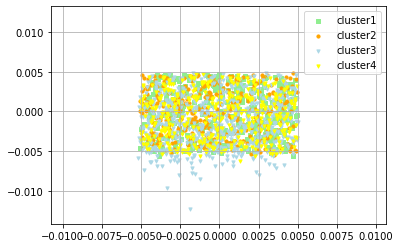

In [58]:
plt.scatter(X[y_km==0,0],X[y_km==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[y_km==1,0],X[y_km==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[y_km==2,0],X[y_km==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[y_km==3,0],X[y_km==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[y_km==4,0],X[y_km==4,1],c='red',marker='v',s=10 , label='cluster5')
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',marker='*',s=30 , label='center cluster')

plt.legend()
plt.grid(True)
plt.show()

In [59]:
len(temp_cluster_result[temp_cluster_result['cluster']==0]) # 이슈

381

In [60]:
len(temp_cluster_result[temp_cluster_result['cluster']==1]) # 인플

378

In [61]:
len(temp_cluster_result[temp_cluster_result['cluster']==2]) # 거래소 돈

630

In [62]:
len(temp_cluster_result[temp_cluster_result['cluster']==3]) # 비즈

383

In [63]:
temp_cluster_result['category'] = 1 # 1 영문뉴스, 2 국문뉴스 , 3 twitter
temp_cluster_result.loc[temp_cluster_result['cluster']==0,'label'] = 5 # 이슈
temp_cluster_result.loc[temp_cluster_result['cluster']==1,'label'] = 6 # 인플
temp_cluster_result.loc[temp_cluster_result['cluster']==2,'label'] = 12 # 거래소,돈
temp_cluster_result.loc[temp_cluster_result['cluster']==3,'label'] = 7 # 비즈

In [64]:
from sklearn import cluster
from sklearn import metrics
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [65]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [66]:
kmeans.inertia_

1.4586597695755386

In [67]:
print ("Cluster id labels for inputted data")
print (labels)

Cluster id labels for inputted data
[3 1 3 ... 3 3 3]


In [68]:
cluster_values= list(model.wv.vocab)

In [69]:
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))

Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):
-1.4586596


In [70]:
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')

In [71]:
print ("Silhouette_score: ")
print (silhouette_score)

Silhouette_score: 
0.00953263


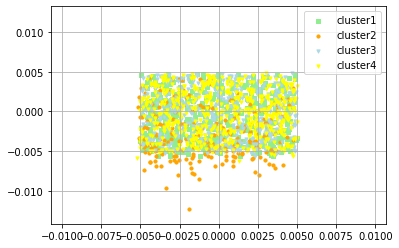

In [72]:
kmeans_label = kmeans.labels_

plt.scatter(X[kmeans_label==0,0],X[kmeans_label==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[kmeans_label==1,0],X[kmeans_label==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[kmeans_label==2,0],X[kmeans_label==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[kmeans_label==3,0],X[kmeans_label==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[kmeans_label==4,0],X[kmeans_label==4,1],c='red',marker='v',s=10 , label='cluster5')

plt.legend()
plt.grid(True)
plt.show()

In [73]:
temp_cluster_result1 = pd.DataFrame(columns=temp_heder)
temp_cluster_result1['word'] = list(model.wv.vocab)
temp_cluster_result1['cluster'] = kmeans_label

In [74]:
#temp_cluster_result1[temp_cluster_result1['cluster']==0].head(30) #시도 및 혼돈  # 혼란 부정적 
temp_cluster_result1['raw_data'] = X.tolist()

In [75]:
temp_cluster_result1['centroid'] = temp_cluster_result1['cluster'].apply(lambda x : centroids[x])

In [76]:
euclidean_centroid_list = []
for euclidean_centroid in temp_cluster_result1['centroid'] :
    euclidean_centroid_list.append(euclidean_centroid.tolist())

In [77]:
temp_distance1 = pairwise_distances(X,euclidean_centroid_list, metric='euclidean')

In [78]:
import scipy.spatial.distance as dist

In [79]:
temp_cluster_result1['distance'] = temp_cluster_result1.apply(lambda x : dist.euclidean(x.raw_data,x.centroid),axis=1)

In [80]:
temp_cluster_result1['tfidf'] = tf_idf_value
temp_cluster_result1['score'] = temp_cluster_result1.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result1

In [81]:
temp_cluster_result1[temp_cluster_result1['cluster']==0].sort_values('score',ascending=False).nsmallest(50,'score') # 비즈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
473,"[-0.0028301789425313473, -0.004559128545224667...",exchange,0,"[-0.00047827736, -0.0008149968, 4.1259627e-05,...",0.027623,0.020743,1.006880,NaN
754,"[-0.0019459029426798224, -0.005357305053621530...",miner,0,"[-0.00047827736, -0.0008149968, 4.1259627e-05,...",0.032034,0.022817,1.009217,NaN
184,"[-0.0029371464625000954, -0.000331176153849810...",start,0,"[-0.00047827736, -0.0008149968, 4.1259627e-05,...",0.026755,0.016594,1.010160,NaN
80,"[0.00238005630671978, -0.004639759194105864, -...",lightning,0,"[-0.00047827736, -0.0008149968, 4.1259627e-05,...",0.031368,0.020743,1.010625,NaN
1118,"[-0.004422098398208618, -0.002236412838101387,...",electronic,0,"[-0.00047827736, -0.0008149968, 4.1259627e-05,...",0.028115,0.014520,1.013595,NaN
665,"[0.0028956171590834856, 0.001550906803458929, ...",early,0,"[-0.00047827736, -0.0008149968, 4.1259627e-05,...",0.026789,0.012446,1.014344,NaN
92,"[0.001096037682145834, -0.00035451370058581233...",proof,0,"[-0.00047827736, -0.0008149968, 4.1259627e-05,...",0.027479,0.012446,1.015033,NaN
282,"[0.00401603477075696, 0.003899469505995512, 0....",break,0,"[-0.00047827736, -0.0008149968, 4.1259627e-05,...",0.030168,0.014520,1.015648,NaN
496,"[-0.0012190045090392232, -0.005653603468090296...",sovereign,0,"[-0.00047827736, -0.0008149968, 4.1259627e-05,...",0.028227,0.012446,1.015782,NaN
831,"[-0.004202652256935835, -0.0016416641883552074...",least,0,"[-0.00047827736, -0.0008149968, 4.1259627e-05,...",0.028644,0.012446,1.016199,NaN


In [82]:
temp_cluster_result1[temp_cluster_result1['cluster']==1].sort_values('score',ascending=False).nsmallest(30,'score') # 거래소

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
8,"[-0.0018822337733581662, -0.012307804077863693...",bitcoin,1,"[-0.00057217065, -0.002608012, -0.00151453, 0....",0.052455,0.910610,0.141845,NaN
467,"[-0.004796051885932684, -0.007344764191657305,...",gold,1,"[-0.00057217065, -0.002608012, -0.00151453, 0....",0.033593,0.112011,0.921581,NaN
45,"[-0.0042004999704658985, -0.004731641616672277...",money,1,"[-0.00057217065, -0.002608012, -0.00151453, 0....",0.029048,0.093343,0.935705,NaN
46,"[-0.002135448856279254, -0.0015474767424166203...",people,1,"[-0.00057217065, -0.002608012, -0.00151453, 0....",0.029281,0.070526,0.958756,NaN
25,"[-0.0018169813556596637, -0.006524092983454466...",make,1,"[-0.00057217065, -0.002608012, -0.00151453, 0....",0.032287,0.066377,0.965910,NaN
99,"[-0.001240696758031845, -0.008496591821312904,...",ethereum,1,"[-0.00057217065, -0.002608012, -0.00151453, 0....",0.032558,0.064303,0.968256,NaN
166,"[-0.0015665910905227065, -0.007883962243795395...",interest,1,"[-0.00057217065, -0.002608012, -0.00151453, 0....",0.029627,0.058080,0.971547,NaN
361,"[0.0011582225561141968, -0.0003017593116965145...",price,1,"[-0.00057217065, -0.002608012, -0.00151453, 0....",0.029207,0.056006,0.973201,NaN
148,"[0.0020390923600643873, -0.001536453957669437,...",market,1,"[-0.00057217065, -0.002608012, -0.00151453, 0....",0.029419,0.056006,0.973413,NaN
164,"[0.0001827547821449116, -0.006678287871181965,...",year,1,"[-0.00057217065, -0.002608012, -0.00151453, 0....",0.028496,0.053931,0.974565,NaN


In [83]:
temp_cluster_result1[temp_cluster_result1['cluster']==2].sort_values('score',ascending=False).nsmallest(40,'score')  # 이슈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
107,"[0.0032208473421633244, -0.002955031581223011,...",privacy,2,"[0.00014037231, -0.00029417887, 9.094423e-06, ...",0.029660,0.020743,1.008917,NaN
138,"[0.0032678628340363503, -0.0036587456706911325...",crypto,2,"[0.00014037231, -0.00029417887, 9.094423e-06, ...",0.027701,0.018669,1.009033,NaN
739,"[0.004692158196121454, 0.0011349840788170695, ...",example,2,"[0.00014037231, -0.00029417887, 9.094423e-06, ...",0.027999,0.018669,1.009331,NaN
1072,"[0.0007710765348747373, -0.00224076840095222, ...",cycle,2,"[0.00014037231, -0.00029417887, 9.094423e-06, ...",0.030930,0.016594,1.014336,NaN
481,"[0.0011471922043710947, -0.004708871711045504,...",monetary,2,"[0.00014037231, -0.00029417887, 9.094423e-06, ...",0.029963,0.014520,1.015443,NaN
583,"[0.0031939197797328234, -0.002547607524320483,...",fight,2,"[0.00014037231, -0.00029417887, 9.094423e-06, ...",0.027910,0.012446,1.015465,NaN
210,"[0.004750516265630722, 0.0012120060855522752, ...",chaos,2,"[0.00014037231, -0.00029417887, 9.094423e-06, ...",0.030453,0.014520,1.015933,NaN
317,"[-0.002789377002045512, -0.0049521164037287235...",stable,2,"[0.00014037231, -0.00029417887, 9.094423e-06, ...",0.026420,0.010371,1.016049,NaN
325,"[-0.0009603553335182369, 0.003748773830011487,...",issue,2,"[0.00014037231, -0.00029417887, 9.094423e-06, ...",0.026858,0.010371,1.016487,NaN
839,"[0.0020433913450688124, -0.005297800526022911,...",payment,2,"[0.00014037231, -0.00029417887, 9.094423e-06, ...",0.031203,0.014520,1.016683,NaN


In [84]:
temp_cluster_result1[temp_cluster_result1['cluster']==3].sort_values('score',ascending=False).nsmallest(20,'score') # 인플,

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
169,"[-0.00011465753050288185, 0.001305638812482357...",write,3,"[0.00014153929, -0.00010437367, -0.00050450617...",0.026783,0.014520,1.012263,NaN
1219,"[0.0020519958343356848, 0.0023144343867897987,...",increase,3,"[0.00014153929, -0.00010437367, -0.00050450617...",0.028808,0.014520,1.014288,NaN
1115,"[0.0033510816283524036, -0.0019085361855104566...",back,3,"[0.00014153929, -0.00010437367, -0.00050450617...",0.029126,0.014520,1.014606,NaN
627,"[0.0020835089962929487, -0.0008384198299609125...",news,3,"[0.00014153929, -0.00010437367, -0.00050450617...",0.029460,0.014520,1.014940,NaN
394,"[0.003941970411688089, -0.001938505214639008, ...",find,3,"[0.00014153929, -0.00010437367, -0.00050450617...",0.029725,0.014520,1.015205,NaN
366,"[0.003016574075445533, 0.00010527519043534994,...",month,3,"[0.00014153929, -0.00010437367, -0.00050450617...",0.028546,0.012446,1.016100,NaN
702,"[0.0008121702121570706, -0.00252560805529356, ...",offer,3,"[0.00014153929, -0.00010437367, -0.00050450617...",0.028842,0.012446,1.016396,NaN
948,"[0.003865422448143363, 0.0012153905117884278, ...",test,3,"[0.00014153929, -0.00010437367, -0.00050450617...",0.024880,0.008297,1.016582,NaN
322,"[0.0013113566674292088, -0.006195065565407276,...",history,3,"[0.00014153929, -0.00010437367, -0.00050450617...",0.029645,0.012446,1.017200,NaN
526,"[-0.005059964023530483, -0.003812753828242421,...",protect,3,"[0.00014153929, -0.00010437367, -0.00050450617...",0.027792,0.010371,1.017420,NaN


In [85]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==0]) # 비즈

486

In [86]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==1]) #거래소

242

In [87]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==2]) # 이슈 

489

In [88]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==3]) #인플

555

In [89]:
temp_cluster_result1['category'] = 3 # 1 영문뉴스, 2 국문뉴스 , 3 twitter
temp_cluster_result1.loc[temp_cluster_result1['cluster']==0,'label'] = 7 # 비즈
temp_cluster_result1.loc[temp_cluster_result1['cluster']==1,'label'] = 12 # 거래소
temp_cluster_result1.loc[temp_cluster_result1['cluster']==2,'label'] = 5 # 이슈
temp_cluster_result1.loc[temp_cluster_result1['cluster']==3,'label'] = 6 # 인플

In [90]:
temp_cluster_result1['result'] = 1 # 1 상승 2 하락 3 보합
temp_cluster_result['result'] = 1
temp_cluster_result1['Silhouette'] = 0.00953263 # 1 상승 2 하락 3 보합
temp_cluster_result['Silhouette'] = 0.00953263

In [91]:
temp_cluster_result1.to_csv("../cluster/twitter/twitter_2019_up2_euclidean.csv")
temp_cluster_result.to_csv("../cluster/twitter/twitter_2019_up2_cosine.csv")

In [93]:
word_vectors = model.wv

In [94]:
vocabs = word_vectors.vocab.keys()

In [95]:
word_vector_list = [word_vectors[v]for v in vocabs]

In [96]:
print(word_vectors.similarity(w1='little',w2='push'))

0.99857104


In [97]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
xys = pca.fit_transform(word_vector_list)

In [98]:
xys

array([[ 1.91762854e+00,  1.00464941e-04],
       [ 2.41042694e-01,  1.30420782e-03],
       [ 1.59111222e+00,  3.57644364e-03],
       ...,
       [-3.11496146e-01,  2.03772445e-03],
       [-3.11973668e-01,  2.79474988e-03],
       [-2.83442870e-01, -1.34272206e-03]])

In [99]:
xys[:,0]

array([ 1.91762854,  0.24104269,  1.59111222, ..., -0.31149615,
       -0.31197367, -0.28344287])

In [100]:
xys[:,1]

array([ 0.00010046,  0.00130421,  0.00357644, ...,  0.00203772,
        0.00279475, -0.00134272])

In [101]:
xs = xys[:,0]
ys = xys[:,1]

In [102]:
def plot_2d_graph(vocabs,xs,ys) :
    plt.figure(figsize=(8,6))
    plt.scatter(xs,ys,marker='o')
    for i,v in enumerate(vocabs) :
        plt.annotate(v,xy=(xs[i],ys[i]))

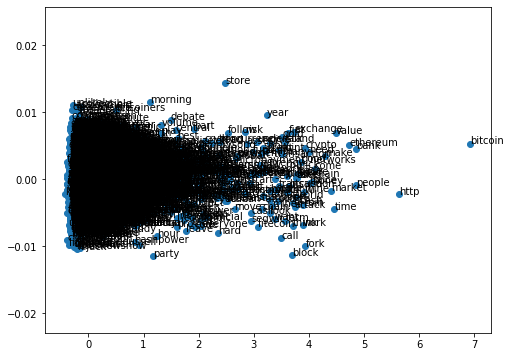

In [103]:
plot_2d_graph(vocabs,xs,ys)

In [100]:
nltk.help.upenn_tagset

<function nltk.help.upenn_tagset(tagpattern=None)>